# Las letras de la Rosalía

![link](https://media.giphy.com/media/TccqwFCNZfbH9VSTFh/giphy.gif)

# Objetivo

El objetivo principal de este proyecto es saber cuáles son las palabras que más utiliza Rosalía en sus letras y hacer un cluster.

Resources:
- Musixmatch lyrics API https://developer.musixmatch.com/documentation

Esta API solamente devuelve el 30% de la letra, así que analizaremos el 30% inicial de cada letra de Rosalía

# Resumen de librerías

In [1]:
import pandas as pd
from pandas import json_normalize

import requests 
import json
import os

import time

import sys

import re
import nltk

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
url = "https://api.musixmatch.com/ws/1.1/"

Links a las buenas prácticas de esta API:
- https://developer.musixmatch.com/documentation/restrictions
- https://developer.musixmatch.com/documentation

In [4]:
pip install pymusixmatch

Note: you may need to restart the kernel to use updated packages.


In [5]:
from musixmatch import Musixmatch
musixmatch = Musixmatch('3aadb259d1ce74a23fe6a97b960a3be2')
#usamos el diccionario creado por otro usuario como librería y le añadimos el token para poder acceder a la información

In [6]:
apikey = "3aadb259d1ce74a23fe6a97b960a3be2"

# ID de artista
De la información sacada podemos obtener el id de artista de Rosalía en la web 'artist_id': 34647327

In [49]:
def rosi_song_info(artist, track):
    apikey = "3aadb259d1ce74a23fe6a97b960a3be2"
    musixmatch = Musixmatch(apikey)
    result = musixmatch.track_search(q_artist=artist, q_track=track, page_size=1, page=1, s_track_rating=1)
    track_id = result['message']['body']['track_list'][0]['track']['track_id']
    track_lyrics = musixmatch.track_lyrics_get(track_id)
    letra = track_lyrics["message"]["body"]["lyrics"]["lyrics_body"]
    return letra.lower()

In [97]:
def limpieza(letra):
    letra= re.sub('<[^<]+?>', '', letra)
    letra = re.sub('[^\w\s]', '', letra)
    letra = re.sub(r'[0-9]', '', letra)
    letra = re.sub('this lyrics is not for commercial use', '', letra)
    return letra 

In [98]:
artist_id = '56117640' 
album_id = '56745077'

#"ROSALÍA feat. Rauw Alejandro" 
#Album RR

In [10]:
musixmatch.artist_get('56117640')

{'message': {'header': {'status_code': 200,
   'execute_time': 0.0081870555877686},
  'body': {'artist': {'artist_id': 56117640,
    'artist_name': 'ROSALÍA feat. Rauw Alejandro',
    'artist_name_translation_list': [],
    'artist_comment': '',
    'artist_country': '',
    'artist_alias_list': [],
    'artist_rating': 48,
    'artist_twitter_url': '',
    'artist_credits': {'artist_list': [{'artist': {'artist_id': 34647327,
        'artist_name': 'ROSALÍA',
        'artist_name_translation_list': [{'artist_name_translation': {'language': 'JA',
           'translation': 'ロザリア'}}],
        'artist_comment': '',
        'artist_country': '',
        'artist_alias_list': [{'artist_alias': 'ロザリア'}],
        'artist_rating': 82,
        'artist_twitter_url': '',
        'artist_credits': {'artist_list': []},
        'restricted': 0,
        'updated_time': '2022-03-21T09:25:31Z',
        'begin_date_year': '',
        'begin_date': '0000-00-00',
        'end_date_year': '',
        'end_da

# 3 últimas canciones. amor

BESO


In [11]:
info_beso = musixmatch.track_search(q_artist="ROSALÍA feat. Rauw Alejandro", q_track="beso", page_size=1, page=1, s_track_rating=1)
info_beso

{'message': {'header': {'status_code': 200,
   'execute_time': 0.013604879379272,
   'available': 1},
  'body': {'track_list': [{'track': {'track_id': 254754635,
      'track_name': 'BESO',
      'track_name_translation_list': [],
      'track_rating': 94,
      'commontrack_id': 158189128,
      'instrumental': 0,
      'explicit': 0,
      'has_lyrics': 1,
      'has_subtitles': 1,
      'has_richsync': 1,
      'num_favourite': 7,
      'album_id': 56745077,
      'album_name': 'RR',
      'artist_id': 56117640,
      'artist_name': 'ROSALÍA feat. Rauw Alejandro',
      'track_share_url': 'https://www.musixmatch.com/lyrics/ROSAL%C3%8DA-Rauw-Alejandro/BESO?utm_source=application&utm_campaign=api&utm_medium=Ironhack%3A1409623266826',
      'track_edit_url': 'https://www.musixmatch.com/lyrics/ROSAL%C3%8DA-Rauw-Alejandro/BESO/edit?utm_source=application&utm_campaign=api&utm_medium=Ironhack%3A1409623266826',
      'restricted': 0,
      'updated_time': '2023-03-28T02:07:10Z',
      'prim

In [12]:
id_beso= '254754635'

In [129]:
beso = rosi_song_info("ROSALÍA feat. Rauw Alejandro", "beso")

In [130]:
beso_limpieza = limpieza(beso)

In [131]:
print (beso_limpieza)

ya yo necesito otro beso
uno de esos que tú me da
estar lejos de ti e el infierno
estar cerca de ti e mi paz
y es que amo siempre que llegas y odio cuando te vas
yo me voy contigo a matar
no me dejes sola pa dónde vas a dónde vas

naahah nanaahna
ven pa cá
ahahah nanaah
a dónde vas yeah

ohoh ohoh
si me baila me lo da todo
ohoh ohoh
ya estamo solo y se quita todo

mis sentimiento no caben en esta pluma
ey cómo decirte
tú еre la exponentе infinita la equi la suma
te queda pequeña la luna
y aunque esté lejo tú ere la persona más cerca de mí
si mi cel se va a apagar solo te aviso a ti


  



PROMESA

In [118]:
promesa = rosi_song_info("Rosalía", "promesa")

In [120]:
promesa_limpieza = limpieza(promesa)

In [121]:
print(promesa_limpieza)

cumpliré mi promesa la que te dije aquel día
la noche despejá no llovía
tus ojos robaron el agua del mar
aunque sea un tramo largo
con tu sonrisa recargo la fuerza
las penas a tu lao no me quedan
tu corriente todo se lo lleva

si es libre la caída
da igual cómo empiece es cómo termina
es que tú tás loquita como yo
pesa más el corazón que la razón

una promesa
nunca es pa mirar atrás
si preguntaras
yo te lo volvería a jurar
como una perla
que volvió al fondo del mar


  



VAMPIROS

In [78]:
vampiro = rosi_song_info("Rosalía", "vampiros")

In [122]:
vampiro_limpieza = limpieza(vampiro)

In [123]:
print (vampiro_limpieza)

mi pistola
no tiene seguro se dispara sola
es de barcelona pero está en carola
ella no es seguidora ella es la ola

mi pistola
no tiene seguro se dispara sola
es de barcelona pero está en carola
ella no es seguidora ella es la ola

nosotros tenemos la calle prendia
salimos de noche llegamos de día
mi nena cerca de mí mi nene cerca de mí
en verdad nunca importó lo que nadie decía

tú sabes que esta noche nos fuimos al garete eh
tú eres el más que le mete
tú sabes que esta noche nos fuimos al garete ey
tú eres la más que le mete

dónde la noche está espesá


  



# El mal querer. desamor

PIENSO EN TU MIRÁ

In [72]:
mira = rosi_song_info("Rosalía", "pienso en tu mira")

In [99]:
mira_limpieza = limpieza(mira)

In [100]:
print (mira_limpieza)

me da miedo cuando sales
sonriendo pa la calle
porque todos pueden ver
los hoyuelitos que te salen

y del aire cuando pasa
por levantarte el cabello
y del oro que te viste
por amarrarse a tu cuello

y del cielo y de la luna
porque tú quieras mirarlo
hasta del agua que bebes
cuando te mojas los labios

pienso en tu mirá tu mirá clavá es una bala en el pecho
pienso en tu mirá tu mirá clavá es una bala en el pecho
pienso en tu mirá tu mirá clavá es una bala en el pecho

pienso en tu mirá


  



BAGDAD

In [103]:
bagdad = rosi_song_info("Rosalía", "bagdad")

In [105]:
bagdad_limpieza = limpieza(bagdad)

In [106]:
print (bagdad_limpieza)

y se va a quemar si sigue ahí
las llamas van al cielo a morir
ya no hay nadie más por ahí
no hay nadie más sentaíta dando palmas

y se va a quemar si sigue ahí
las llamas van al cielo a morir
ya no hay nadie más por ahí
no hay nadie más no hay nadie más

por la noche la salía del bagdad
pelo negro ojo oscuro
bonita pero apena

sentaíta cabizbaja dando palma
mientras a su alrededor

pasaban la miraban
la miraban sin ver na
solita en el infierno
en el infierno está atrapá


  



DI MI NOMBRE

In [74]:
nombre = rosi_song_info("Rosalía", "di mi nombre")

In [107]:
nombre_limpieza = limpieza(nombre)

In [108]:
print (nombre_limpieza)

ay alí alí alí alí alí alí yalí ya
ay alí alí alí alí alí alí yalí ya

di mi nombre
cuando no haya nadie cerca
cuando no haya nadie cerca
cuando no haya nadie cerca

que las cosas
que las cosas que me dices
que las cosas que me dices
no salgan por esa puerta

y átame con tu cabello


  



QUE NO SALGA LA LUNA

In [109]:
luna = rosi_song_info("Rosalía", "que no salga la luna")

In [111]:
luna_limpieza = limpieza(luna)

In [112]:
print (luna_limpieza)

qué suerte la que yo tuve
el día que lo encontré
señalaito a punta de navaja
prima sobre la pared
señalaito a punta de navaja
prima sobre la pared

como las hojas de un cuchillo
brillaban los sacáis suyos cuando le di el anillo
brillaban los sacáis brillaban los sacáis
brillaban los sacáis suyos
brillaban los sacáis brillaban los sacáis
que brillanan sus sacáis brillaban los sacáis

si hay alguien que aquí se oponga
que no levante la voz que no lo escuche la novia
que no salga la luna que no tiene pa qué
no tiene pa qué no tiene pa qué


  



# Para filtrar las palabras "vacías"

In [64]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
import nltk

In [144]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('spanish'))
text = "Esta es una oración de ejemplo que incluye palabras vacías."
words = word_tokenize(text)

filtered_words = [word for word in words if not word in stop_words]
print(filtered_words)

['Esta', 'oración', 'ejemplo', 'incluye', 'palabras', 'vacías', '.']


In [145]:
stop_words = set(stopwords.words('spanish'))
text = (beso_limpieza)
words = word_tokenize(text)

filtered_beso = [word for word in words if not word in stop_words]
print(filtered_beso)

['necesito', 'beso', 'da', 'lejos', 'infierno', 'cerca', 'paz', 'amo', 'siempre', 'llegas', 'odio', 'vas', 'voy', 'contigo', 'matar', 'dejes', 'sola', 'pa', 'dónde', 'vas', 'dónde', 'vas', 'naahah', 'nanaahna', 'ven', 'pa', 'cá', 'ahahah', 'nanaah', 'dónde', 'vas', 'yeah', 'ohoh', 'ohoh', 'si', 'baila', 'da', 'ohoh', 'ohoh', 'estamo', 'solo', 'quita', 'sentimiento', 'caben', 'pluma', 'ey', 'cómo', 'decirte', 'еre', 'exponentе', 'infinita', 'equi', 'suma', 'queda', 'pequeña', 'luna', 'aunque', 'lejo', 'ere', 'persona', 'cerca', 'si', 'cel', 'va', 'apagar', 'solo', 'aviso']


In [146]:
stop_words = set(stopwords.words('spanish'))
text = (vampiro_limpieza)
words = word_tokenize(text)

filtered_vampiro = [word for word in words if not word in stop_words]
print(filtered_vampiro)

['pistola', 'seguro', 'dispara', 'sola', 'barcelona', 'carola', 'seguidora', 'ola', 'pistola', 'seguro', 'dispara', 'sola', 'barcelona', 'carola', 'seguidora', 'ola', 'calle', 'prendia', 'salimos', 'noche', 'llegamos', 'día', 'nena', 'cerca', 'nene', 'cerca', 'verdad', 'nunca', 'importó', 'nadie', 'decía', 'sabes', 'noche', 'garete', 'eh', 'mete', 'sabes', 'noche', 'garete', 'ey', 'mete', 'dónde', 'noche', 'espesá']


In [147]:
stop_words = set(stopwords.words('spanish'))
text = (promesa_limpieza)
words = word_tokenize(text)

filtered_promesa = [word for word in words if not word in stop_words]
print(filtered_promesa)

['cumpliré', 'promesa', 'dije', 'aquel', 'día', 'noche', 'despejá', 'llovía', 'ojos', 'robaron', 'agua', 'mar', 'aunque', 'tramo', 'largo', 'sonrisa', 'recargo', 'fuerza', 'penas', 'lao', 'quedan', 'corriente', 'lleva', 'si', 'libre', 'caída', 'da', 'igual', 'cómo', 'empiece', 'cómo', 'termina', 'tás', 'loquita', 'pesa', 'corazón', 'razón', 'promesa', 'nunca', 'pa', 'mirar', 'atrás', 'si', 'preguntaras', 'volvería', 'jurar', 'perla', 'volvió', 'fondo', 'mar']


In [148]:
stop_words = set(stopwords.words('spanish'))
text = (luna_limpieza)
words = word_tokenize(text)

filtered_luna = [word for word in words if not word in stop_words]
print(filtered_luna)

['suerte', 'día', 'encontré', 'señalaito', 'punta', 'navaja', 'prima', 'pared', 'señalaito', 'punta', 'navaja', 'prima', 'pared', 'hojas', 'cuchillo', 'brillaban', 'sacáis', 'di', 'anillo', 'brillaban', 'sacáis', 'brillaban', 'sacáis', 'brillaban', 'sacáis', 'brillaban', 'sacáis', 'brillaban', 'sacáis', 'brillanan', 'sacáis', 'brillaban', 'sacáis', 'si', 'alguien', 'aquí', 'oponga', 'levante', 'voz', 'escuche', 'novia', 'salga', 'luna', 'pa', 'pa', 'pa']


In [149]:
stop_words = set(stopwords.words('spanish'))
text = (bagdad_limpieza)
words = word_tokenize(text)

filtered_bagdad = [word for word in words if not word in stop_words]
print(filtered_bagdad)

['va', 'quemar', 'si', 'sigue', 'ahí', 'llamas', 'van', 'cielo', 'morir', 'nadie', 'ahí', 'nadie', 'sentaíta', 'dando', 'palmas', 'va', 'quemar', 'si', 'sigue', 'ahí', 'llamas', 'van', 'cielo', 'morir', 'nadie', 'ahí', 'nadie', 'nadie', 'noche', 'salía', 'bagdad', 'pelo', 'negro', 'ojo', 'oscuro', 'bonita', 'apena', 'sentaíta', 'cabizbaja', 'dando', 'palma', 'mientras', 'alrededor', 'pasaban', 'miraban', 'miraban', 'ver', 'na', 'solita', 'infierno', 'infierno', 'atrapá']


In [150]:
stop_words = set(stopwords.words('spanish'))
text = (mira_limpieza)
words = word_tokenize(text)

filtered_mira = [word for word in words if not word in stop_words]
print(filtered_mira)

['da', 'miedo', 'sales', 'sonriendo', 'pa', 'calle', 'pueden', 'ver', 'hoyuelitos', 'salen', 'aire', 'pasa', 'levantarte', 'cabello', 'oro', 'viste', 'amarrarse', 'cuello', 'cielo', 'luna', 'quieras', 'mirarlo', 'agua', 'bebes', 'mojas', 'labios', 'pienso', 'mirá', 'mirá', 'clavá', 'bala', 'pecho', 'pienso', 'mirá', 'mirá', 'clavá', 'bala', 'pecho', 'pienso', 'mirá', 'mirá', 'clavá', 'bala', 'pecho', 'pienso', 'mirá']


In [151]:
stop_words = set(stopwords.words('spanish'))
text = (nombre_limpieza)
words = word_tokenize(text)

filtered_nombre = [word for word in words if not word in stop_words]
print(filtered_nombre)

['ay', 'alí', 'alí', 'alí', 'alí', 'alí', 'alí', 'yalí', 'ay', 'alí', 'alí', 'alí', 'alí', 'alí', 'alí', 'yalí', 'di', 'nombre', 'nadie', 'cerca', 'nadie', 'cerca', 'nadie', 'cerca', 'cosas', 'cosas', 'dices', 'cosas', 'dices', 'salgan', 'puerta', 'átame', 'cabello']


Usando esta web https://wordcloudplus.com/projects/1/cloud realizo los clusters

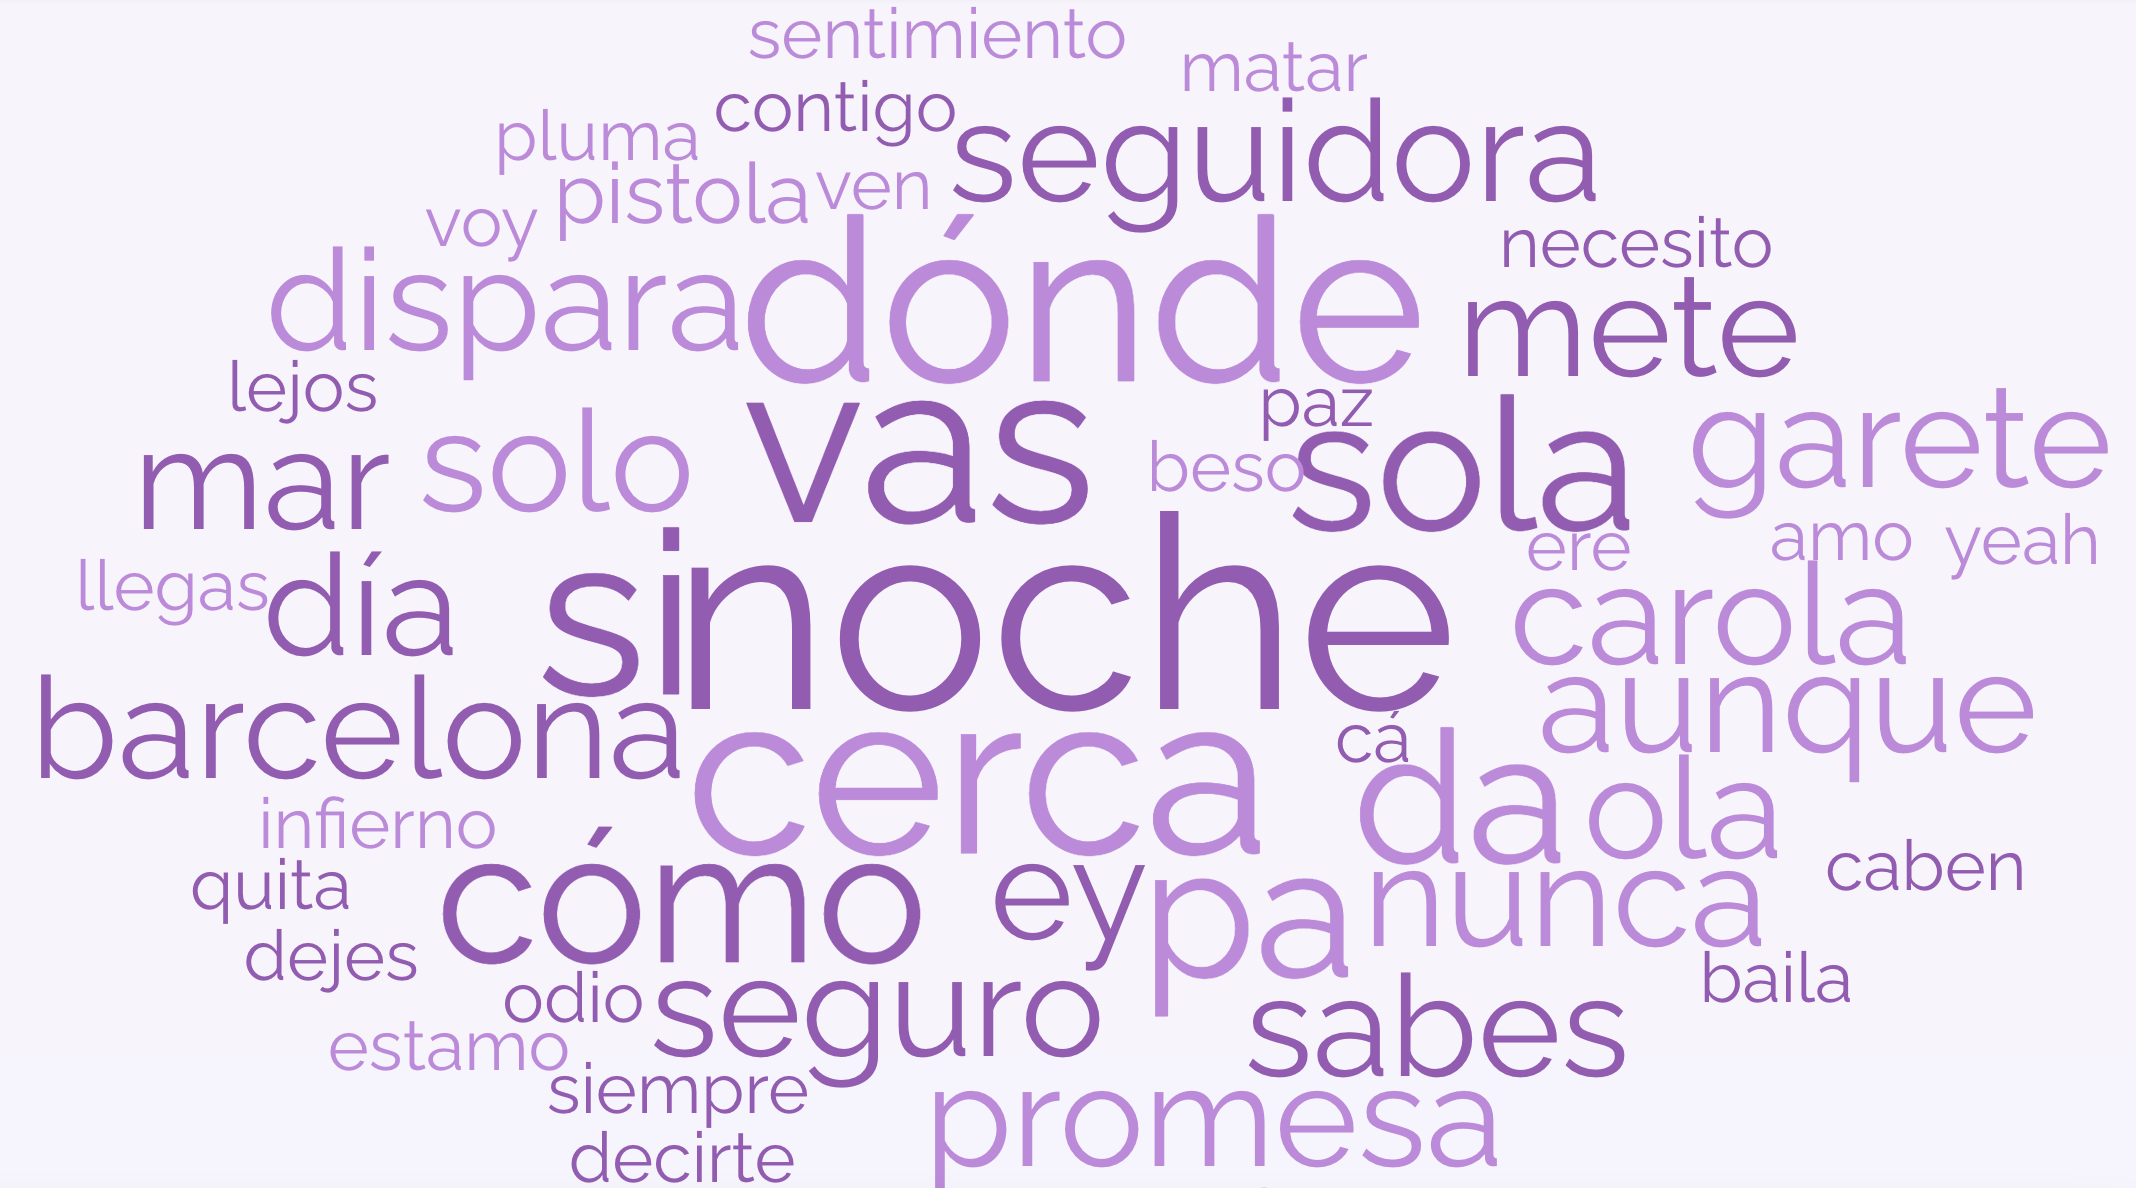

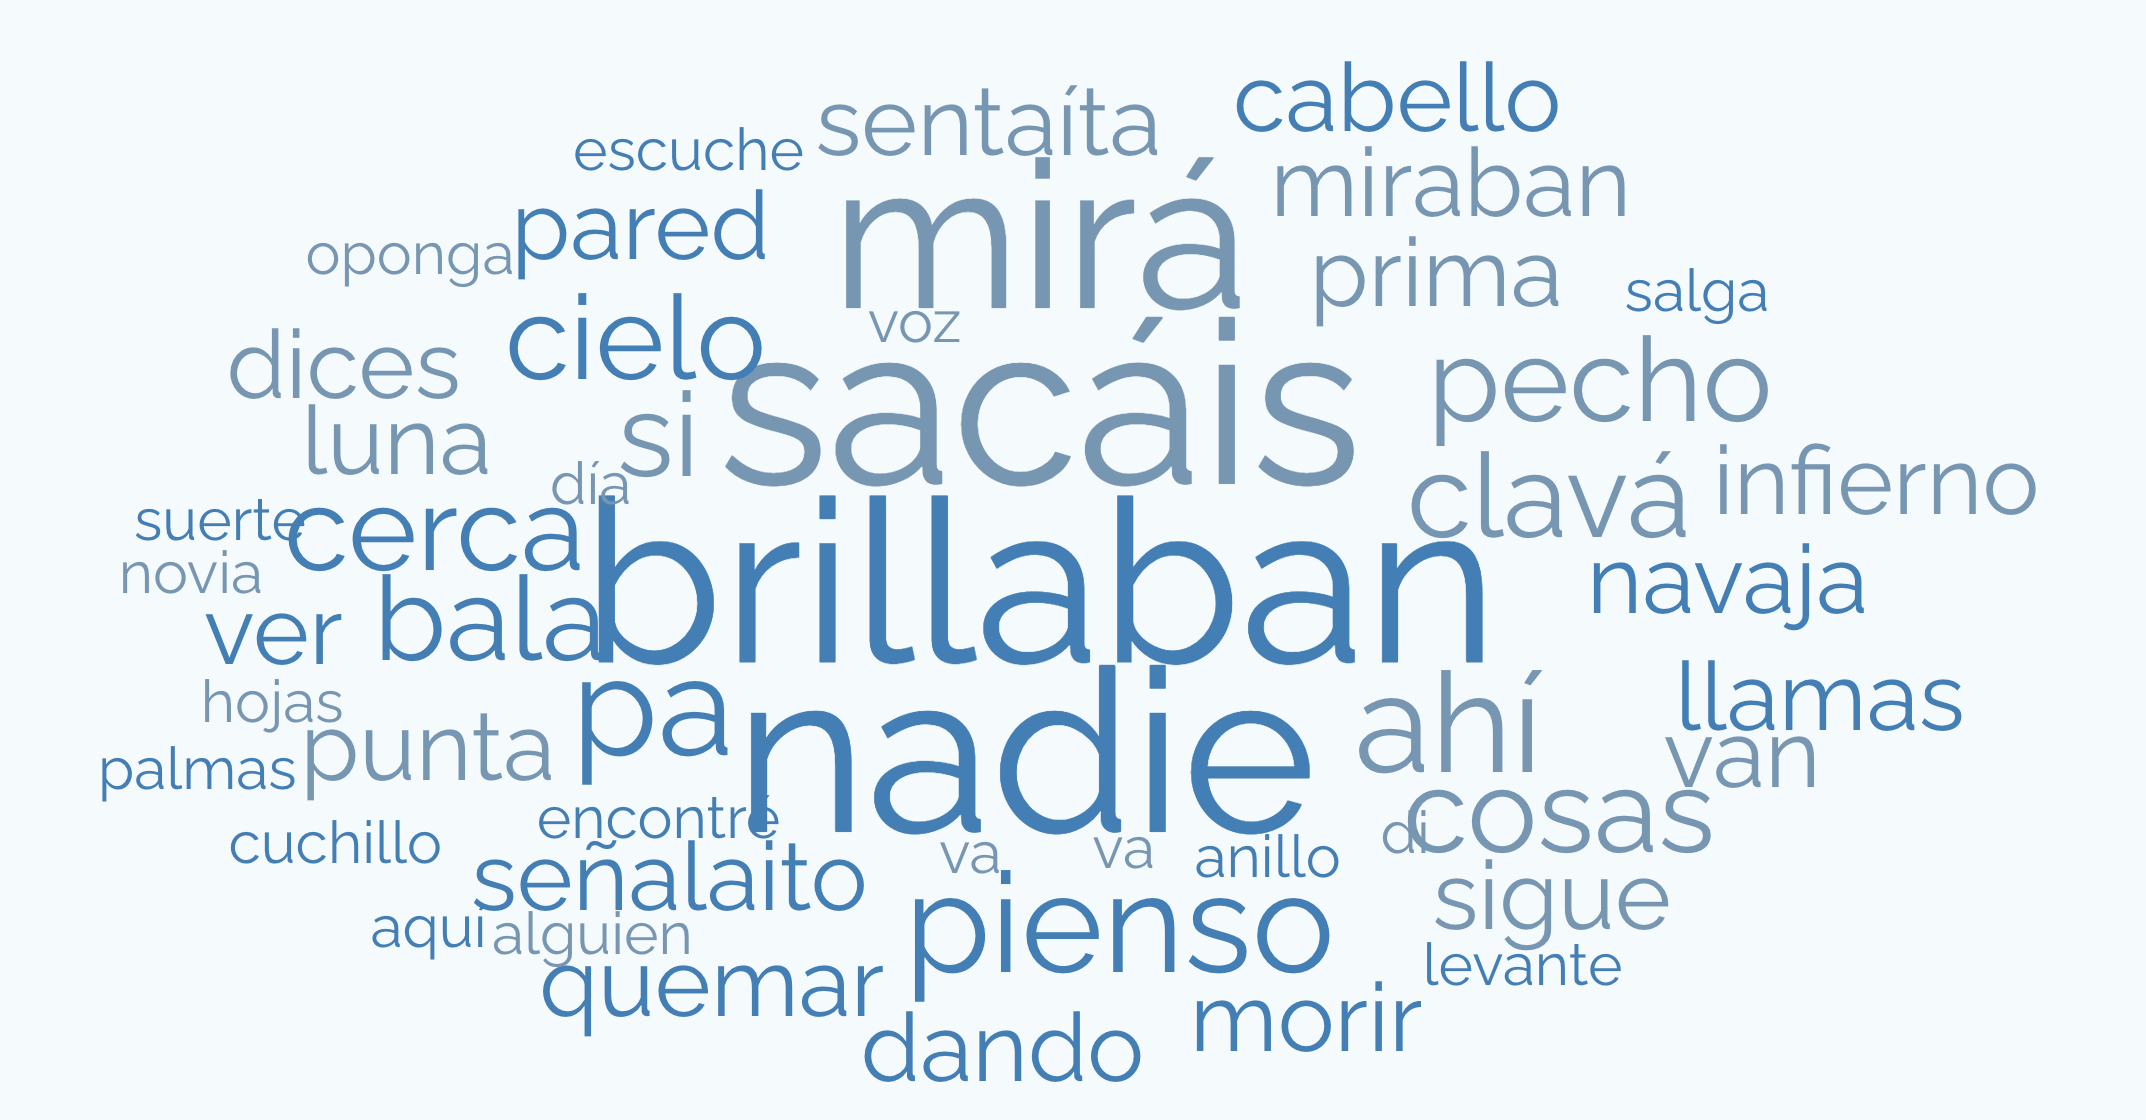